MDS
---
Multidimensional Scaling
* Replication of 2020 article https://link.springer.com/article/10.1007/s42113-020-00073-z (https://osf.io/efjmq)
    * Rocks dataset was created in 2017 here: https://link.springer.com/article/10.3758/s13428-017-0884-8 (https://osf.io/w64fv)
    * Further work in Sanders' 2018 doctoral thesis https://scholarworks.iu.edu/dspace/handle/2022/22415 (https://osf.io/d6b9y)
        * includes the relevant additional data such as the 360 rocks images set
* Dataset: 120 Rock Images
* We have a ready prepared file with MDS coordinates
* And we have similarity judgements from which we could compute these MDS coordinates on our own

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from glob import glob

rock_images_glob = "120 Rock Images/*.png"
rock_images = glob(rock_images_glob)
rock_images.sort() # get them in the right order

judgements_glob = "Similarity Judgments Data/rocks_similarity_120_*.txt"
judgements_files = glob(judgements_glob)

mds_file = "MDS/mds_120_supplemental_dims.txt"

## A random rock

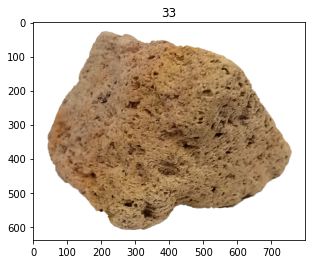

In [2]:
rock_id = 33
img = Image.open(rock_images[rock_id])
plt.imshow(img)
plt.title(rock_id);

## MDS coordinates from file

`MDS/mds_120_supplemental_dims.txt`

In [3]:
mds_obs = np.loadtxt(mds_file, skiprows=1)
mds_obs

array([[-0.72, -0.61, -0.19, ..., -1.8 , -4.5 , -5.  ],
       [ 0.3 ,  1.5 ,  1.01, ..., -2.5 , -3.  , -5.  ],
       [-0.55,  2.72, -0.24, ..., -2.55, -4.5 , -5.  ],
       ...,
       [ 0.65, -3.06,  1.93, ..., -1.05, -5.  , -2.  ],
       [-0.21, -1.53,  0.24, ..., -1.95, -5.  , -2.  ],
       [-0.78, -2.99, -0.99, ..., -0.6 , -5.  , -1.5 ]])

In [4]:
print("Number of rocks:     ", np.shape(mds_obs)[0])
print("Number of dimensions:", np.shape(mds_obs)[1])

Number of rocks:      120
Number of dimensions: 13


### Plot functions

In [5]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def imscatter(x, y, image, ax=None, zoom=1):
    """
    Creates scatter with image file
    """
    
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    
    return artists


def plot_dims(dim_a, dim_b, mds_obs, rock_images):
    """
    Plots rocks for given dimensions
    """
    plt.figure(figsize = (6, 6))
    for i, rock in enumerate(rock_images):
        imscatter(mds_obs[i, dim_a-1], mds_obs[i, dim_b-1], rock, zoom = 0.033)
    plt.xlabel(f"MDS Dimension {dim_a}")
    plt.ylabel(f"MDS Dimension {dim_b}")
    
    return None


def plot_predictions(dim, mds_obs, cnn_pred, rock_images):
    """
    Plots rocks observed vs predicted values
    """
    
    r = np.corrcoef(cnn_pred[:, dim-1], mds_obs[:, dim-1]).min()
    
    plt.figure(figsize = (6, 6))
    for i, rock in enumerate(rock_images):
        imscatter(cnn_pred[i, dim-1], mds_obs[i, dim-1], rock, zoom = 0.02)
    plt.xlabel(f"Dimension {dim} predicted")
    plt.ylabel(f"Dimension {dim} observed")
    plt.title(f"$r$ = {r:,.2f}")
    
    return None


def plot_compare_preds(dim, mds_obs, cnn_pred_a, cnn_pred_b, title_a, title_b, rock_images):
    """
    2 Plots to compare 2 different kinds of predictions.
    Each plot displays observed vs predicted values
    """
    
    r_a = np.corrcoef(cnn_pred_a[:, dim-1], mds_obs[:, dim-1]).min()
    r_b = np.corrcoef(cnn_pred_b[:, dim-1], mds_obs[:, dim-1]).min()
    
    fig = plt.figure(figsize = (12, 6))
    
    # plot a
    ax_1 = plt.subplot(1, 2, 1)
    for i, rock in enumerate(rock_images):
        imscatter(cnn_pred_a[i, dim-1], mds_obs[i, dim-1], rock, zoom = 0.02, ax = ax_1)
    ax_1.set_xlabel(f"Dimension {dim} predicted")
    ax_1.set_ylabel(f"Dimension {dim} observed")
    ax_1.set_title(f"{title_a}: $r$ = {r_a:,.2f}")
    
    # plot b
    ax_2 = plt.subplot(1, 2, 2, sharey = ax_1)
    for i, rock in enumerate(rock_images):
        imscatter(cnn_pred_b[i, dim-1], mds_obs[i, dim-1], rock, zoom = 0.02, ax = ax_2)
    ax_2.set_xlabel(f"Dimension {dim} predicted")
    ax_2.set_title(f"{title_b}: $r$ = {r_b:,.2f}")
    fig.tight_layout()
    
    return None

### a) Dimensions 1 vs 2

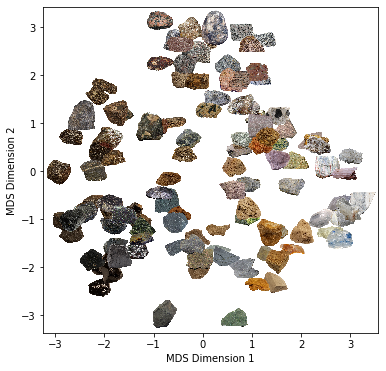

In [6]:
plot_dims(1, 2, mds_obs, rock_images)

### b) Dimensions 3 vs 4

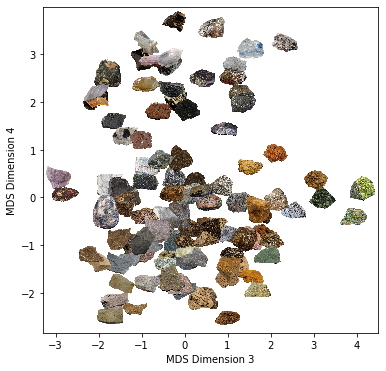

In [7]:
plot_dims(3, 4, mds_obs, rock_images)

### c) Dimensions 5 vs 6

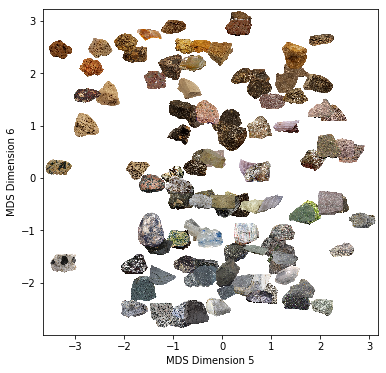

In [8]:
plot_dims(5, 6, mds_obs, rock_images)

### d) Dimensions 7 vs 8

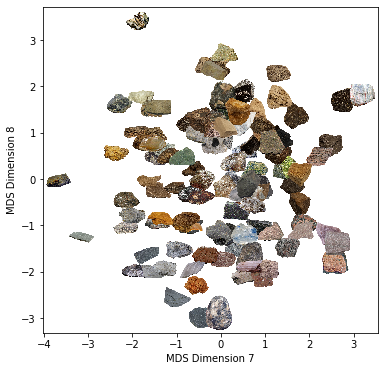

In [9]:
plot_dims(7, 8, mds_obs, rock_images)

### e) Dimensions 8 vs 6

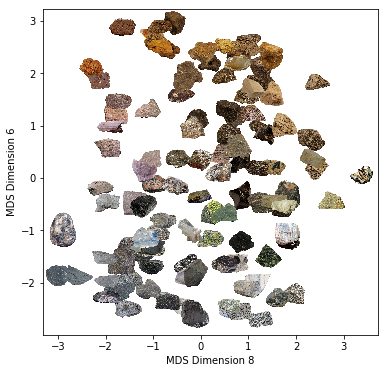

In [6]:
plot_dims(8, 6, mds_obs, rock_images)

**TODO**: Replicate MDS coordinates from the original similarity judgements ...

In [7]:
len(judgements_files)

80

In [8]:
#
#
#
#
#
#
#
#
#

## CNN predictions

### Using the predictions reported by Sanders & Nosofsky and ...

... comparing them to the results we get when we train (a) the same model (b) a model that we built in PyTorch. 

* original predictions by Sanders & Nosofsky are in the file `CNN Predictions/MDS Dimensions/cnn_predicted_mds_120.txt`
* replicated predictions (a) are in the file `CNN Predictions/MDS Dimensions/cnn_own_predicted_mds_120.txt`
* replicated predictions (b) are in the file `CNN Predictions/MDS Dimensions/cnn_torch_predicted_mds_120.txt`

In [6]:
cnn_pred_file = "CNN Predictions/MDS Dimensions/cnn_predicted_mds_120.txt"
cnn_pred = np.loadtxt(cnn_pred_file)

cnn_ownpred_file = "CNN Predictions/MDS Dimensions/cnn_own_predicted_mds_120.txt"
cnn_ownpred = np.loadtxt(cnn_ownpred_file)

cnn_torch_pred_file = "CNN Predictions/MDS Dimensions/cnn_torch_predicted_mds_120.txt"
cnn_torch_pred = np.loadtxt(cnn_torch_pred_file)

# just to check everything's correct in the files
print("Number of rocks:             ", np.shape(cnn_pred)[0])
print("Number of dimensions:        ", np.shape(cnn_pred)[1])
print("Number of rocks (own):       ", np.shape(cnn_ownpred)[0])
print("Number of dimensions (own):  ", np.shape(cnn_ownpred)[1])
print("Number of rocks (torch):     ", np.shape(cnn_torch_pred)[0])
print("Number of dimensions (torch):", np.shape(cnn_torch_pred)[1])

Number of rocks:              120
Number of dimensions:         8
Number of rocks (own):        120
Number of dimensions (own):   8
Number of rocks (torch):      120
Number of dimensions (torch): 8


In [28]:
from sklearn.metrics import r2_score

score = r2_score(mds_obs[:, :8], cnn_pred)
score_own = r2_score(mds_obs[:, :8], cnn_ownpred)
score_torch = r2_score(mds_obs[:, :8], cnn_torch_pred)

print('R² scores overall')
print(f'sanders & nosofsky (2020):    {score: ,.2f}')
print(f'replication same keras model: {score_own: ,.2f}')
print(f'replication pytorch model:    {score_torch: ,.2f}')

R² scores overall
sanders & nosofsky (2020):    -0.20
replication same keras model: -0.28
replication pytorch model:    -1.50


In [45]:
dim = 4

score = r2_score(mds_obs[:, dim-1], cnn_pred[:, dim-1])
score_own = r2_score(mds_obs[:, dim-1], cnn_ownpred[:, dim-1])
score_torch = r2_score(mds_obs[:, dim-1], cnn_torch_pred[:, dim-1])

print(f'R² scores dimension {dim}')
print(f'sanders & nosofsky (2020):    {score: ,.2f}')
print(f'replication same keras model: {score_own: ,.2f}')
print(f'replication pytorch model:    {score_torch: ,.2f}')

R² scores dimension 4
sanders & nosofsky (2020):     0.07
replication same keras model: -0.39
replication pytorch model:    -1.78


In [46]:
np.corrcoef(mds_obs[:, dim-1], cnn_pred[:, dim-1]).min()

0.8381551927226706

#### Lightness

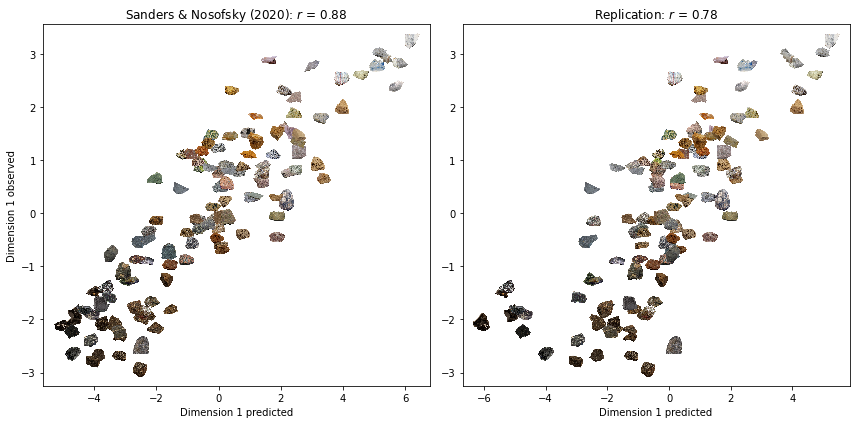

In [8]:
plot_compare_preds(1, mds_obs, cnn_pred, cnn_ownpred, "Sanders & Nosofsky (2020)", "Replication", rock_images)

#### Grain size

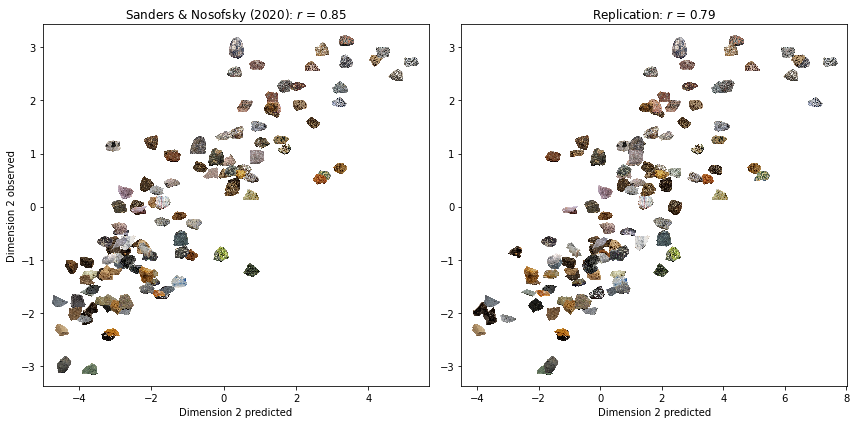

In [15]:
plot_compare_preds(2, mds_obs, cnn_pred, cnn_ownpred, "Sanders & Nosofsky (2020)", "Replication", rock_images)

#### Roughness

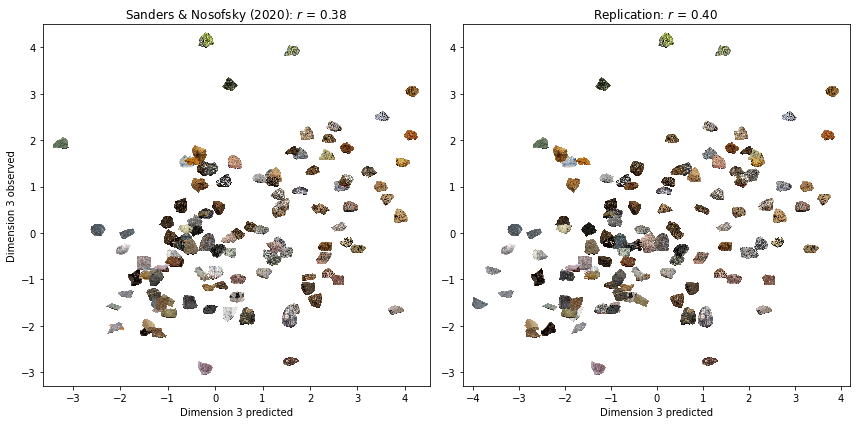

In [16]:
plot_compare_preds(3, mds_obs, cnn_pred, cnn_ownpred, "Sanders & Nosofsky (2020)", "Replication", rock_images)

#### Shininess

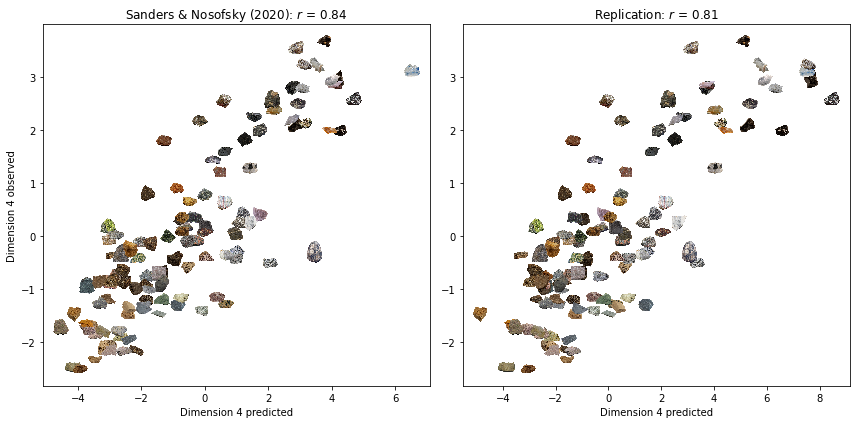

In [17]:
plot_compare_preds(4, mds_obs, cnn_pred, cnn_ownpred, "Sanders & Nosofsky (2020)", "Replication", rock_images)

#### Organization

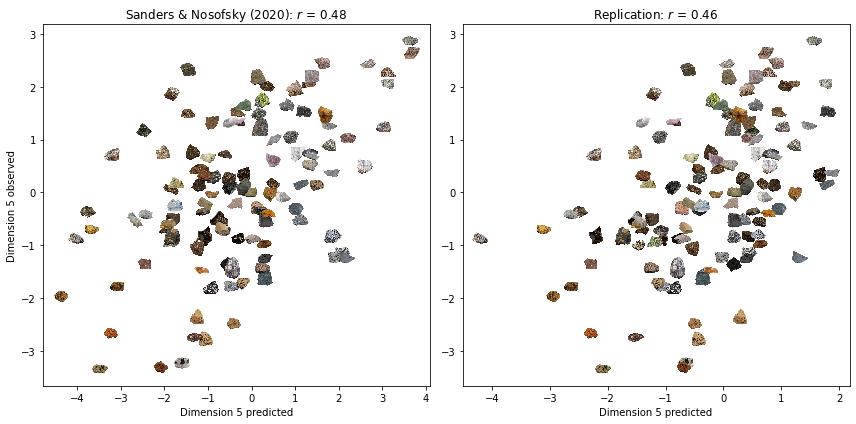

In [18]:
plot_compare_preds(5, mds_obs, cnn_pred, cnn_ownpred, "Sanders & Nosofsky (2020)", "Replication", rock_images)

#### Chromacity

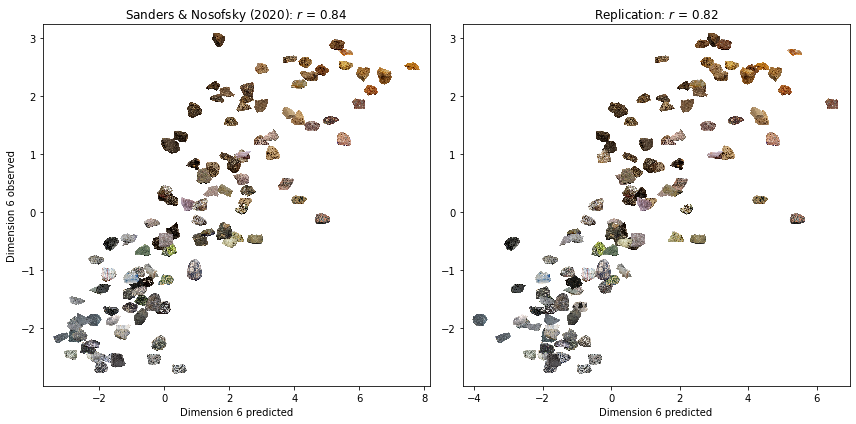

In [19]:
plot_compare_preds(6, mds_obs, cnn_pred, cnn_ownpred, "Sanders & Nosofsky (2020)", "Replication", rock_images)

#### Shape

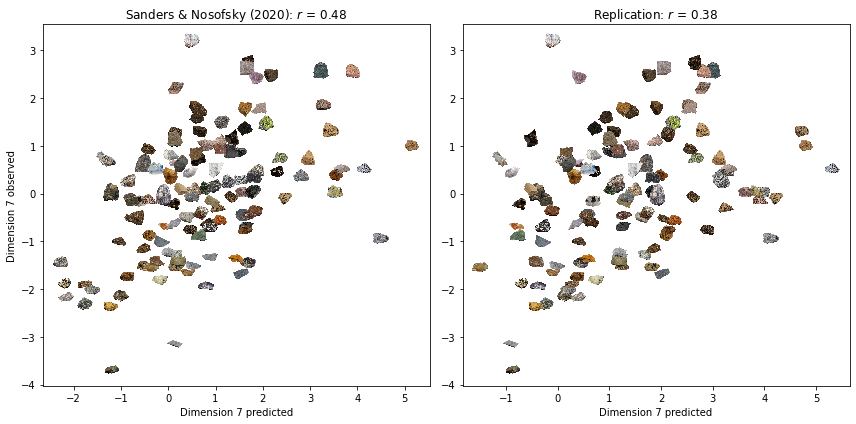

In [20]:
plot_compare_preds(7, mds_obs, cnn_pred, cnn_ownpred, "Sanders & Nosofsky (2020)", "Replication", rock_images)

#### Hue

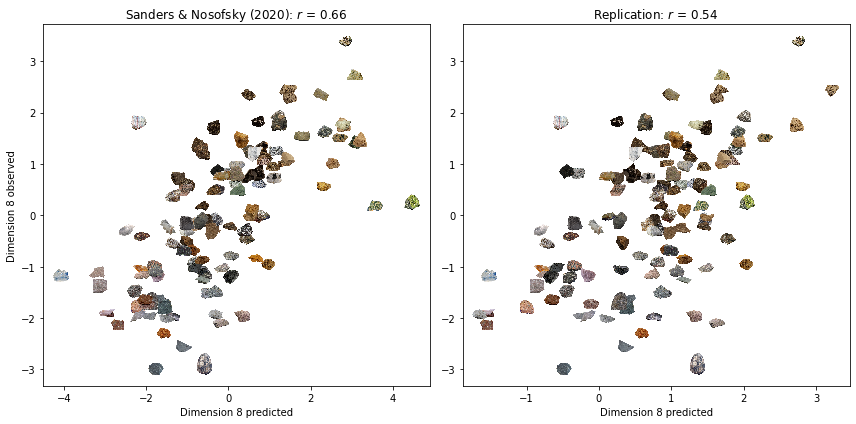

In [21]:
plot_compare_preds(8, mds_obs, cnn_pred, cnn_ownpred, "Sanders & Nosofsky (2020)", "Replication", rock_images)

Conclusion: With replicating the authors Keras-model we are getting similar results, yet the correlations are not as high.

### Plausibility check for 360 Rocks Training Dataset

In [38]:
import pandas as pd

path_to_360 = "../sanders_2018/360 Rocks/"
df_360 = pd.read_csv("../finetuning_torchvision_data/mds_360.csv")
rock_images_360 = list(path_to_360 + df_360.image_name)
mds_obs_360 = df_360.iloc[:, 1:].values

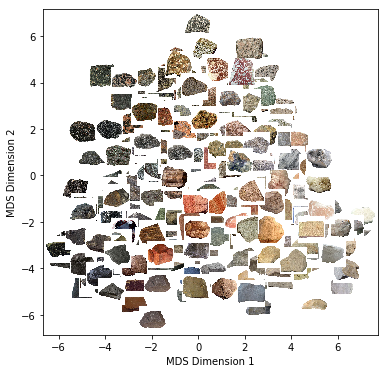

In [39]:
plot_dims(1, 2, mds_obs_360, rock_images_360)

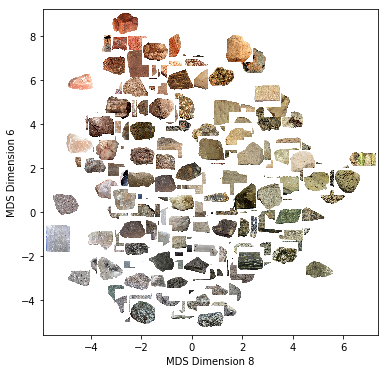

In [41]:
plot_dims(8, 6, mds_obs_360, rock_images_360)